<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/The_Bread_Basket_Analysis/The_Bread_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍞  **빵가게 장바구니 연관 분석**

In [59]:
import datetime
import calendar
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [60]:
data = pd.read_csv("/content/drive/MyDrive/bread basket.csv")

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [62]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


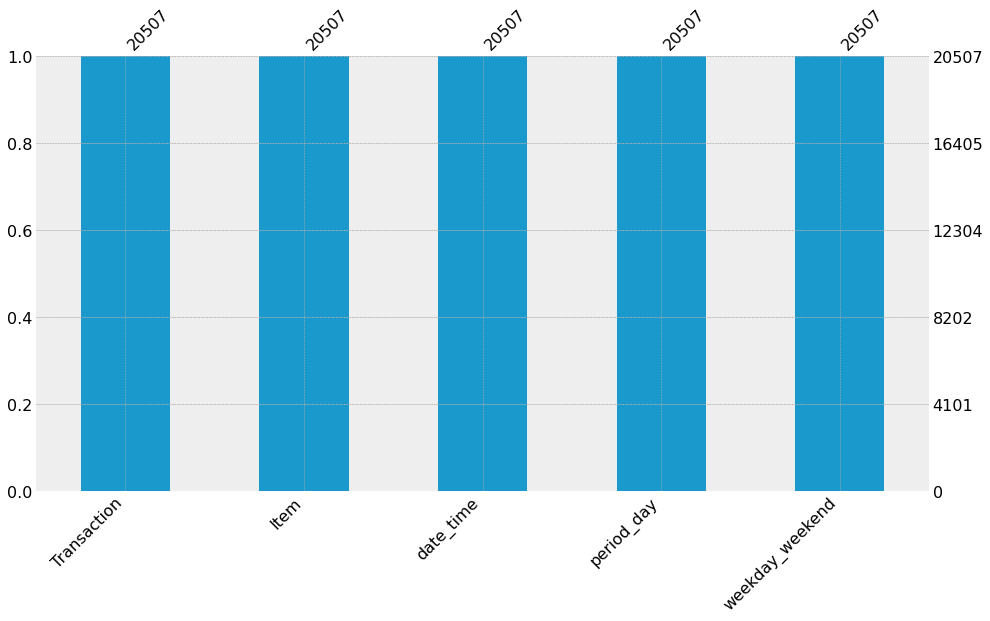

In [63]:
msno.bar(df=data.iloc[:, :], figsize=(16,8),color=(0.1, 0.6, 0.8))

결측값은 존재하지 않습니다.

In [64]:
print('빵가게에서는 총 {}개의 다른 품목들을 판매하고 있습니다.'.format(len(data['Item'].unique())))

빵가게에서는 총 94개의 다른 품목들을 판매하고 있습니다.


In [65]:
print('총 고유값은 {}개로 구성되어 있습니다.'.format(data['Transaction'].nunique()))

총 고유값은 9465개로 구성되어 있습니다.


## **데이터 전처리**

날짜와 시간 데이터를 보면 범위가 크게 잡혀있는것으로 보입니다. 전처리를 통해 좀 더 세부적으로 쪼개도록 하겠습니다.

In [66]:
data.date_time

0        30-10-2016 09:58
1        30-10-2016 10:05
2        30-10-2016 10:05
3        30-10-2016 10:07
4        30-10-2016 10:07
               ...       
20502    09-04-2017 14:32
20503    09-04-2017 14:32
20504    09-04-2017 14:57
20505    09-04-2017 14:57
20506    09-04-2017 15:04
Name: date_time, Length: 20507, dtype: object

In [67]:
day = []
for dt in data.date_time:
    day_num = datetime.datetime.strptime(dt.split(' ')[0], '%d-%m-%Y').weekday() # 시간을 문자 형태로 출력후 요일은 숫자로 반환
    day.append(calendar.day_name[day_num]) #요일로 변환

In [68]:
day[0:10]

['Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday']

In [69]:
# 날짜 시간 상세하게 분리하기
data['date'] = pd.to_datetime(data['date_time']).dt.date
data['time'] = pd.to_datetime(data['date_time']).dt.time
data['day'] = day
data['month'] = pd.to_datetime(data['date_time']).dt.month
data['hour'] = pd.to_datetime(data['date_time']).dt.hour

In [70]:
# 숫자로된 월데이터를 텍스트로 변환
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),  ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [71]:
data.drop(['date_time'], axis=1, inplace=True)
data.rename(columns={'weekday_weekend': 'day_type'}, inplace=True)
data.head()

,Transaction,Item,period_day,day_type,date,time,day,month,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,Sunday,October,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,Sunday,October,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,Sunday,October,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,Sunday,October,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,Sunday,October,10


## **EDA**

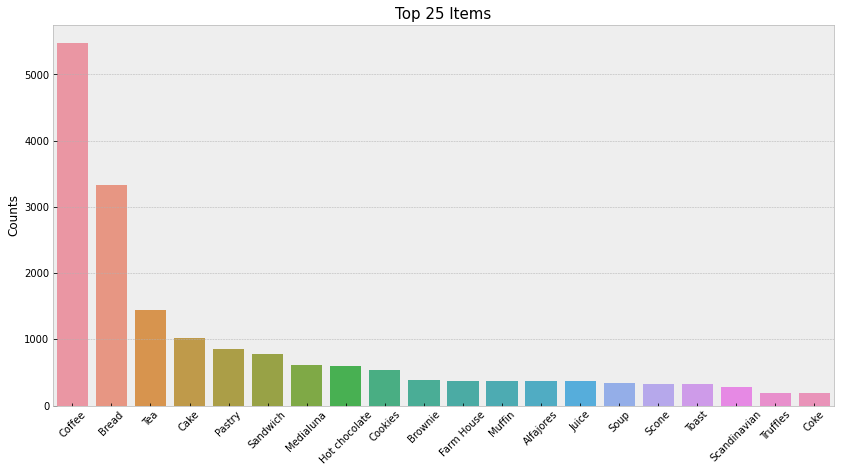

In [72]:
plt.figure(figsize=(14, 7))
sns.barplot(x=data.Item.value_counts().head(20).index, y=data.Item.value_counts().head(20))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 25 Items', fontsize=15,color='black')
plt.show()

주로 커피가 가장 많이 팔립니다. 다음으로는 빵, 티, 케이크 등이 있었습니다.

In [73]:
month_count = data.groupby('month')['Transaction'].count().reset_index()
day_count = data.groupby('day')['Transaction'].count().reset_index()
hour_count = data.groupby('hour')['Transaction'].count().reset_index()

In [74]:
month_count['order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
month_count.sort_values('order', inplace=True)

In [75]:
day_count['order'] = [5, 1, 6, 7, 4, 2, 3]
day_count.sort_values('order', inplace=True)

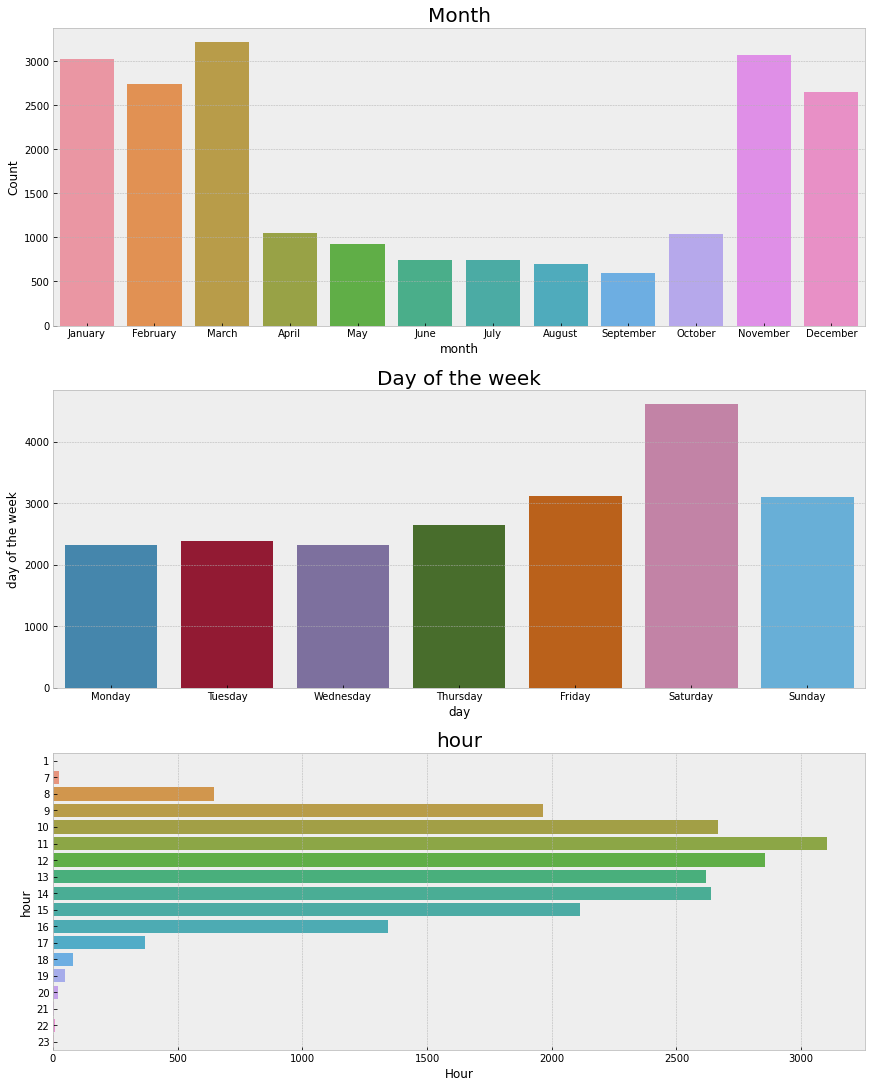

In [76]:
fig = plt.figure(figsize=(12, 15), constrained_layout=True) # subplot 간격 조절
gs = gridspec.GridSpec(nrows=3, ncols=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

sns.barplot(x='month', y='Transaction', data=month_count, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Month', fontsize=20)

sns.barplot(x='day', y='Transaction', data=day_count, ax=ax2)
ax2.set_ylabel('day of the week')
ax2.set_title('Day of the week', fontsize=20)

sns.barplot(x='Transaction', y='hour', data=hour_count,orient='h', ax=ax3)
ax3.set_xlabel('Hour')
ax3.set_title('hour', fontsize=20)
plt.show()

- 월에서는 1월, 3월, 11월에서 높은 구매율을 보였습니다.  

- 요일에서는 주로 토요일에 구매율이 높았습니다.

- 시간대에서는 주로 오전, 점심시간에 구매율이 높았습니다.

시간대별로 구매한 폼목의 차이가 있는지 알아보도록 하겠습니다.

In [77]:
data_period = data.groupby(['period_day','Item'])['Transaction'].count().reset_index()
data_period = data_period.sort_values(['period_day','Transaction'],ascending=False)

In [78]:
period = ['morning','afternoon','evening','night']

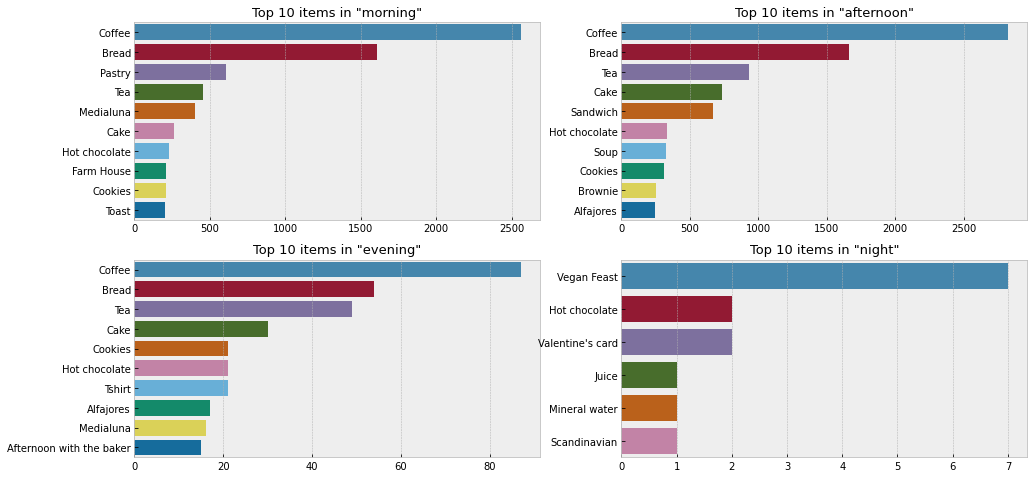

In [79]:
plt.figure(figsize=(16,8))
for i,j in enumerate(period):
    plt.subplot(2,2,i+1)
    df1 = data_period[data_period.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items in "{}"'.format(j), size=13)

plt.show()

아침, 오후, 저녁에는 주로 커피와 빵을 가장 많이 구매한다는 결과가 나왔습니다.  

하지만 밤에는 다른 결과가 나왔습니다. 밤에는 커피와 빵보다는 비건 제품을 많이 구매했고, 핫초코도 구매율이 높았습니다.

## **장바구니 연관 분석**

In [80]:
from mlxtend.frequent_patterns import association_rules, apriori

In [81]:
Transaction = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
Transaction

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [82]:
basket = Transaction.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


장바구니 분석을 하려면 다음과 같이 하나의 행렬을 만들어야 합니다. 이 행렬은 각 트랜잭션에 항목이 있는지 여부를 나타내는 행렬입니다.

In [83]:
# 0, 1 로 변환해주는 함수
def encoding(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

basket = basket.applymap(encoding)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
freq_item = apriori(basket, min_support = 0.01,use_colnames = True)
freq_item

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Cake, Bread, Coffee)"
59,0.011199,"(Coffee, Pastry, Bread)"


apriori는 연관분석에 사용되는 함수입니다. 여기서 최소 지지도 값을 0.01로 설정을 하였습니다.  

0.01의 의미는 총 9465건의 거래 중에서 최소한 94건의 거래 해당 항목을 고려했을 때만 해당 항목이 존재해야 한다는 것을 의미합니다.

이제 규칙을 만들도록 하겠습니다.

In [86]:
rules = association_rules(freq_item, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


신뢰도를 기준으로 정렬을 해봤습니다. 상위권에는 다음과 같은 규칙들이 있었습니다.

- 토스트 → 커피
- 스패니쉬 브런치 → 커피
- 메디아루나 → 커피
- 페이스트리 → 커피

다음 규칙들은 lift가 1보다 크기 때문에 양의 상관관계가 있다고 할 수 있습니다. 어떻게 보면 커피를 가장 많이 구매하기 때문에 이러한 결과가 당연할수도 있다는 생각이 듭니다.

추가적으로 (커피,차) -> 케이크 의 규칙이 lift 값이 가장 높은 결과가 나왔습니다. 이 부분을 해석하자면 커피, 차, 케이크를 모두 함께 구매할 확률이 케이크만 구매하는 확률보다 1.94배 정도 높다고 해석할 수 있습니다.




보통 카페에서는 커피 구매량이 상대적으로 높습니다. 그래서 다음과 같은 결과가 어떻게 보면 당연하다는 생각이 듭니다. 그 커피에 관한 확률이 높기 때문에 다른 규칙들이 영향을 받을수 있습니다. 따라서 이러한 경우 상대적으로 높은 값들을 제거하고 분석을 해보면다면 좀 더 흥미로운 인사이트를 발견할 수 있을것이라고 생각됩니다.